# Import Libraries


In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import collections as collections
from collections import OrderedDict
import plotly.express as px
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import pos_tag
from plotly import graph_objects as go
from nltk.stem import WordNetLemmatizer
import contractions
import emoji
from collections import Counter
from lxml import etree 
import string
import re
import os
import warnings
import random
from bs4 import BeautifulSoup
random.seed(33)
pd.options.display.max_rows = 100
pd.options.display.max_columns =None 

In [2]:
colors1=['#fe726f', '#e44744', '#b13735']
colors2=['#f8ab91', '#f58a65', '#f26839']

# Download Some Packages

In [3]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# Ignore Warnings

In [4]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings(action='ignore')

# Read Data

In [5]:
Corpus = pd.read_csv('18.csv')
Corpus.rename(columns={'reviewText': 'Review', 'overall': 'Sentiment'}, inplace=True)
Corpus.drop(['Unnamed: 0', 'reviewTime'], axis=1, inplace=True)
Corpus['Sentiment'] = Corpus['Sentiment'].map({-1: 'Negative', 0: 'Neutral',  1: 'Positive'})
Corpus

,Sentiment,Review
0,Positive,Just what I needed for a party
1,Positive,Son loves it. Decent quality.
2,Positive,My son wanted to dress like August Pullman fro...
3,Positive,awesome.
4,Positive,My daughter loves this item. My high score is ...
...,...,...
50372,Positive,What I wanted.
50373,Positive,"Husband loves it, as he always dreamed of goin..."
50374,Negative,"Ugh. This shirt looked so good online, it look..."
50375,Positive,Very comfortable to wear


# Percantage Of Each Sentiment

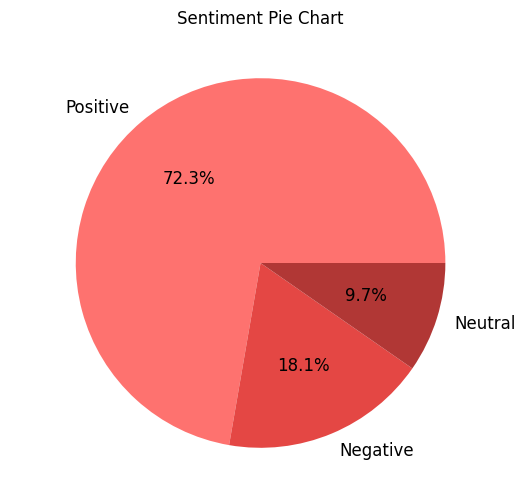

In [6]:
Corpus['Sentiment'].value_counts().plot.pie(autopct = '%0.1f%%',
                                                    textprops = {'size': 'large'},
                                                    title = 'Sentiment Pie Chart',
                                                    figsize = (6,6),
                                                    colors = colors1,
                                                    ylabel = ' ');

# Count Of Each Sentiment

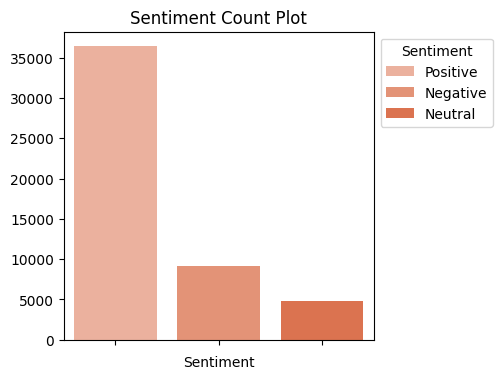

In [7]:
ax, fig = plt.subplots(figsize =(4, 4))
ax =sns.countplot(x='Sentiment', data=Corpus, dodge=False, hue='Sentiment',  order= Corpus['Sentiment'].value_counts().index, hue_order =Corpus['Sentiment'].value_counts().index,  palette=colors2);
ax.set(xticklabels=[]) 
ax.set(ylabel=None) 
plt.title('Sentiment Count Plot')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

# WordCloud

In [8]:
def word_cloud_(Sentiment):
    text = str(Corpus[Corpus['Sentiment'] == Sentiment])
    wordcloud = WordCloud(background_color='white', mode='RGB',width=1500,height=800).generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation='catrom')
    plt.axis("off")
    plt.title('Word Cloud For {} Sentiment'.format(Sentiment))
    plt.show()

**1-Positive** 

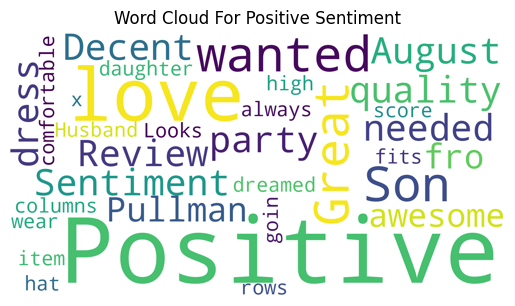

In [9]:
word_cloud_('Positive')

**2-Negative**

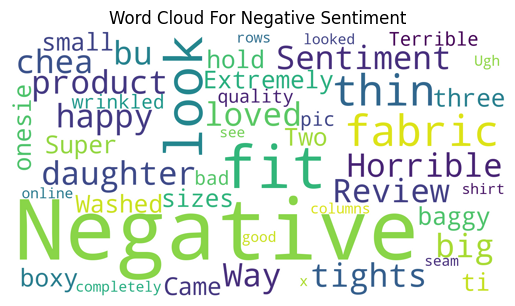

In [10]:
word_cloud_('Negative')

# Word Tokenize

In [11]:
Corpus['Tokenized'] = Corpus['Review'].astype(str).apply(word_tokenize)

In [12]:
Corpus['Tokenized']

0                   [Just, what, I, needed, for, a, party]
1                  [Son, loves, it, ., Decent, quality, .]
2        [My, son, wanted, to, dress, like, August, Pul...
3                                             [awesome, .]
4        [My, daughter, loves, this, item, ., My, high,...
                               ...                        
50372                                 [What, I, wanted, .]
50373    [Husband, loves, it, ,, as, he, always, dreame...
50374    [Ugh, ., This, shirt, looked, so, good, online...
50375                        [Very, comfortable, to, wear]
50376                       [Love, it, love, it, love, it]
Name: Tokenized, Length: 50377, dtype: object

# Number Of Words Before Text Normalization

In [13]:
Corpus["Number of Words1"] = Corpus["Tokenized"].apply(lambda n:len(n))
Corpus["Number of Words1"].sum()

1358457

# Number Of Charachters Before Text Normalization

In [14]:
Corpus["Number of Charachters1"] = Corpus["Review"].str.len()
Corpus["Number of Charachters1"].sum()

6201348

# Number Of Sentences Before Text Normalization

In [15]:
NumberOfTexts1 = Corpus['Review'].apply(lambda n:len(sent_tokenize(n)))
NumberOfTexts1.sum()

121144

# Average Number Of Words Before Text Normalization

In [16]:
AverageNaumberOfWords1 = round(Corpus["Number of Words1"].mean())
AverageNaumberOfWords1

27

# Average Number Of Charachters Before Text Normalization

In [17]:
AverageNumberOfCharachters1 = round(Corpus["Number of Charachters1"].mean())
AverageNumberOfCharachters1

123

# Most Frequent Words Before Text Normalization

In [18]:
MostFrequentWord1 = Counter((Corpus['Tokenized']).explode()).most_common(10)
MostFrequentWordDF1 = pd.DataFrame(MostFrequentWord1, columns=('Word', 'Count'))
MostFrequentWordDF1

,Word,Count
0,.,84780
1,I,43277
2,the,43231
3,and,36735
4,",",31502
5,a,30602
6,it,28488
7,to,22909
8,!,22189
9,is,17957


In [19]:
fig = go.Figure(go.Funnel(
    y = MostFrequentWordDF1['Word'].tolist(),
    x = MostFrequentWordDF1['Count'].tolist(),
    marker = {"color": ["Salmon", "PaleVioletRed", "LightSalmon", "Moccasin", "Lavender", "DarkOliveGreen", "Turquoise", "Chocolate", "MistyRose", "Gainsboro"]}))
fig.show()

In [20]:
fig = px.bar(MostFrequentWordDF1, x='Word', y='Count')
fig.show()

# POS Tagging (Parts of Speech Tagging)

In [21]:
Corpus['Tagged'] = Corpus['Tokenized'].apply(pos_tag)
Corpus.reset_index(inplace=True, drop=True)
Corpus

,Sentiment,Review,Tokenized,Number of Words1,Number of Charachters1,Tagged
0,Positive,Just what I needed for a party,"[Just, what, I, needed, for, a, party]",7,30,"[(Just, RB), (what, WP), (I, PRP), (needed, VB..."
1,Positive,Son loves it. Decent quality.,"[Son, loves, it, ., Decent, quality, .]",7,30,"[(Son, NNP), (loves, VBZ), (it, PRP), (., .), ..."
2,Positive,My son wanted to dress like August Pullman fro...,"[My, son, wanted, to, dress, like, August, Pul...",18,92,"[(My, PRP$), (son, NN), (wanted, VBD), (to, TO..."
3,Positive,awesome.,"[awesome, .]",2,8,"[(awesome, NN), (., .)]"
4,Positive,My daughter loves this item. My high score is ...,"[My, daughter, loves, this, item, ., My, high,...",61,243,"[(My, PRP$), (daughter, NN), (loves, VBZ), (th..."
...,...,...,...,...,...,...
50372,Positive,What I wanted.,"[What, I, wanted, .]",4,14,"[(What, WP), (I, PRP), (wanted, VBD), (., .)]"
50373,Positive,"Husband loves it, as he always dreamed of goin...","[Husband, loves, it, ,, as, he, always, dreame...",18,80,"[(Husband, NNP), (loves, VBZ), (it, PRP), (,, ..."
50374,Negative,"Ugh. This shirt looked so good online, it look...","[Ugh, ., This, shirt, looked, so, good, online...",37,165,"[(Ugh, NNP), (., .), (This, DT), (shirt, NN), ..."
50375,Positive,Very comfortable to wear,"[Very, comfortable, to, wear]",4,24,"[(Very, RB), (comfortable, JJ), (to, TO), (wea..."


# Bigrams

In [22]:
Corpus['Bigrams'] = Corpus['Tokenized'].apply(lambda x: list(nltk.bigrams(x)))
Corpus['Bigrams'][1000]

[('Great', 'for'),
 ('for', 'my'),
 ('my', '11'),
 ('11', 'mo'),
 ('mo', 'old'),
 ('old', 'with'),
 ('with', 'a'),
 ('a', 'big'),
 ('big', 'head-'),
 ('head-', 'adjustable'),
 ('adjustable', 'too'),
 ('too', '!')]

# Trigrams

In [23]:
Corpus['Trigrams'] = Corpus['Tokenized'].apply(lambda x: list(nltk.trigrams(x)))
Corpus['Trigrams'][1000]

[('Great', 'for', 'my'),
 ('for', 'my', '11'),
 ('my', '11', 'mo'),
 ('11', 'mo', 'old'),
 ('mo', 'old', 'with'),
 ('old', 'with', 'a'),
 ('with', 'a', 'big'),
 ('a', 'big', 'head-'),
 ('big', 'head-', 'adjustable'),
 ('head-', 'adjustable', 'too'),
 ('adjustable', 'too', '!')]

# Ngrams

In [24]:
Corpus['Ngrams'] = Corpus['Tokenized'].apply(lambda x: list(nltk.ngrams(x, 4)))
Corpus['Ngrams'][1000]

[('Great', 'for', 'my', '11'),
 ('for', 'my', '11', 'mo'),
 ('my', '11', 'mo', 'old'),
 ('11', 'mo', 'old', 'with'),
 ('mo', 'old', 'with', 'a'),
 ('old', 'with', 'a', 'big'),
 ('with', 'a', 'big', 'head-'),
 ('a', 'big', 'head-', 'adjustable'),
 ('big', 'head-', 'adjustable', 'too'),
 ('head-', 'adjustable', 'too', '!')]

# Text Normalization

In [25]:
def convert_emojis(text):
     text = emoji.demojize(text)   
     return text
def contraction_expand(text):
     text = contractions.fix(text)     
     return text
def remove_puncuation_special_charchater(text):
       punctuations = '`؛،؟.,÷-' + string.punctuation
       text = text.translate(text.maketrans('', '', punctuations))
       return text                                                           
def remove_whitespace(text):
     text = text.replace('  ', ' ')
     return text 
def remove_new_line_char(text):
     text = text.replace('\n', '')
     return text   
def remove_number(text):
     text = ''.join([i for i in text if not i.isdigit()])
     return text
def remove_url(text):
     text = re.sub(r"http\S+", '', text)
     return text
def remove_html_tags(text):
    text = re.sub("<.*?>", "", text)
    return text
def remove_non_english(text):
    ascii_chars = set(string.printable)
    text = ''.join(filter(lambda x: x in ascii_chars, text))
    return text
def remove_stop_words(text):
     stop_words = stopwords.words('english')
     text = text.split() 
     text = ([word for word in text if word not in stop_words])
     return text
def lemmatizer_(text):
       lemmatizer = WordNetLemmatizer()                                                  
       text = [lemmatizer.lemmatize(word) for word in text]  
       return text

In [26]:
def text_normalization(text):
    text = str(text)
    text = text.lower() 
    text = convert_emojis(text)
    text = contraction_expand(text)
    text = remove_url(text)
    text = remove_whitespace(text)
    text = remove_new_line_char(text)
    text = remove_html_tags(text)
    text = remove_puncuation_special_charchater(text)
    text = remove_number(text)
    text = remove_non_english(text)
    text = remove_stop_words(text)
    text = lemmatizer_(text)
    return ' '.join(text)

In [27]:
Corpus['Normalized_Review'] =Corpus['Tokenized'].apply(text_normalization)

In [28]:
Corpus

,Sentiment,Review,Tokenized,Number of Words1,Number of Charachters1,Tagged,Bigrams,Trigrams,Ngrams,Normalized_Review
0,Positive,Just what I needed for a party,"[Just, what, I, needed, for, a, party]",7,30,"[(Just, RB), (what, WP), (I, PRP), (needed, VB...","[(Just, what), (what, I), (I, needed), (needed...","[(Just, what, I), (what, I, needed), (I, neede...","[(Just, what, I, needed), (what, I, needed, fo...",needed party
1,Positive,Son loves it. Decent quality.,"[Son, loves, it, ., Decent, quality, .]",7,30,"[(Son, NNP), (loves, VBZ), (it, PRP), (., .), ...","[(Son, loves), (loves, it), (it, .), (., Decen...","[(Son, loves, it), (loves, it, .), (it, ., Dec...","[(Son, loves, it, .), (loves, it, ., Decent), ...",son love decent quality
2,Positive,My son wanted to dress like August Pullman fro...,"[My, son, wanted, to, dress, like, August, Pul...",18,92,"[(My, PRP$), (son, NN), (wanted, VBD), (to, TO...","[(My, son), (son, wanted), (wanted, to), (to, ...","[(My, son, wanted), (son, wanted, to), (wanted...","[(My, son, wanted, to), (son, wanted, to, dres...",son wanted dress like august pullman wonder li...
3,Positive,awesome.,"[awesome, .]",2,8,"[(awesome, NN), (., .)]","[(awesome, .)]",[],[],awesome
4,Positive,My daughter loves this item. My high score is ...,"[My, daughter, loves, this, item, ., My, high,...",61,243,"[(My, PRP$), (daughter, NN), (loves, VBZ), (th...","[(My, daughter), (daughter, loves), (loves, th...","[(My, daughter, loves), (daughter, loves, this...","[(My, daughter, loves, this), (daughter, loves...",daughter love item high score based feedback t...
...,...,...,...,...,...,...,...,...,...,...
50372,Positive,What I wanted.,"[What, I, wanted, .]",4,14,"[(What, WP), (I, PRP), (wanted, VBD), (., .)]","[(What, I), (I, wanted), (wanted, .)]","[(What, I, wanted), (I, wanted, .)]","[(What, I, wanted, .)]",wanted
50373,Positive,"Husband loves it, as he always dreamed of goin...","[Husband, loves, it, ,, as, he, always, dreame...",18,80,"[(Husband, NNP), (loves, VBZ), (it, PRP), (,, ...","[(Husband, loves), (loves, it), (it, ,), (,, a...","[(Husband, loves, it), (loves, it, ,), (it, ,,...","[(Husband, loves, it, ,), (loves, it, ,, as), ...",husband love always dreamed going princeton fa...
50374,Negative,"Ugh. This shirt looked so good online, it look...","[Ugh, ., This, shirt, looked, so, good, online...",37,165,"[(Ugh, NNP), (., .), (This, DT), (shirt, NN), ...","[(Ugh, .), (., This), (This, shirt), (shirt, l...","[(Ugh, ., This), (., This, shirt), (This, shir...","[(Ugh, ., This, shirt), (., This, shirt, looke...",ugh shirt looked good online look much differe...
50375,Positive,Very comfortable to wear,"[Very, comfortable, to, wear]",4,24,"[(Very, RB), (comfortable, JJ), (to, TO), (wea...","[(Very, comfortable), (comfortable, to), (to, ...","[(Very, comfortable, to), (comfortable, to, we...","[(Very, comfortable, to, wear)]",comfortable wear


# Number Of Words After Text Normalization

In [29]:
Corpus["Number of Words2"] = Corpus["Normalized_Review"].apply(lambda n:len(n.split( )))
Corpus["Number of Words2"].sum()

590468

# Number Of Charachters After Text Normalization

In [30]:
Corpus["Number of Charachters2"] = Corpus["Review"].str.len()
Corpus["Number of Charachters2"].sum()

6201348

# Number Of Sentences After Text Normalization

In [31]:
NumberOfTexts2 = Corpus['Normalized_Review'].apply(lambda n:len(sent_tokenize(n)))
NumberOfTexts2.sum()

50304

# Average Number Of Words After Text Normalization

In [32]:
AverageNaumberOfWords2 = round(Corpus["Number of Words2"].mean())
AverageNaumberOfWords2

12

# Average Number Of Charachters After Text Normalization

In [33]:
AverageNumberOfCharachters2 = round(Corpus["Number of Charachters2"].mean())
AverageNumberOfCharachters2

123

# Most Frequent Words After Text Normalization

In [34]:
MostFrequentWord2 = Counter((Corpus['Normalized_Review']).str.split().explode()).most_common(10)
MostFrequentWordDF2 = pd.DataFrame(MostFrequentWord2, columns=('Word', 'Count'))
MostFrequentWordDF2

,Word,Count
0,fit,11225
1,love,9639
2,great,9012
3,nt,7634
4,size,7230
5,like,6589
6,good,5314
7,quality,5071
8,would,5068
9,look,5049


In [35]:
fig = go.Figure(go.Funnel(
    y = MostFrequentWordDF2['Word'].tolist(),
    x = MostFrequentWordDF2['Count'].tolist(),
    marker = {"color": ["Salmon", "PaleVioletRed", "LightSalmon", "Moccasin", "Lavender", "DarkOliveGreen", "Turquoise", "Chocolate", "MistyRose", "Gainsboro"]}))
fig.show()

In [36]:
fig = px.bar(MostFrequentWordDF2, x='Word', y='Count')
fig.show()

# Split The DataSet Into Independent Variables (X) And Dependent Variable (Y)

In [37]:
X= Corpus['Normalized_Review']
y = Corpus['Sentiment']

# Split The Dataset Into Training And Testing

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

# TfidfVectorizer

In [39]:
Tfidf = TfidfVectorizer()
X_Train_Tfidf = Tfidf.fit_transform(X_train)
X_test_Tfidf = Tfidf.transform(X_test)

In [40]:
vocab = Tfidf.vocabulary_
vocab

{'comfy': 2707,
 'long': 8098,
 'absolutely': 32,
 'love': 8214,
 'product': 10817,
 'workout': 16124,
 'walking': 15674,
 'around': 699,
 'hanging': 6335,
 'comfortable': 2692,
 'rather': 11209,
 'large': 7725,
 'boob': 1539,
 'one': 9562,
 'best': 1265,
 'sport': 13342,
 'bra': 1626,
 'purchased': 10990,
 'flattering': 5315,
 'get': 5841,
 'wet': 15898,
 'transparent': 14785,
 'nipple': 9271,
 'exposed': 4889,
 'suoer': 13885,
 'cute': 3389,
 'pretty': 10742,
 'buy': 1925,
 'itvery': 7311,
 'nice': 9232,
 'glass': 5903,
 'seem': 12302,
 'little': 8030,
 'flimsy': 5349,
 'add': 149,
 'weird': 15858,
 'tint': 14572,
 'looking': 8128,
 'screen': 12219,
 'fit': 5245,
 'fabulously': 4952,
 'though': 14438,
 'pattern': 10020,
 'person': 10194,
 'shinier': 12545,
 'wanted': 15697,
 'amazinf': 424,
 'far': 5016,
 'great': 6125,
 'fitting': 5258,
 'would': 16153,
 'rate': 11207,
 'star': 13454,
 'found': 5519,
 'another': 512,
 'brand': 1648,
 'better': 1275,
 'still': 13562,
 'pleased': 1042

# Models

In [41]:
def models_(model_name):
    model = model_name
    model.fit(X_Train_Tfidf, y_train)
    y_pred = model.predict(X_test_Tfidf)
    return y_pred

# Confusion Matrix

In [42]:
Sentiments = y.sort_values().unique()

In [43]:
def confusion_matrix_(Real, Prediction):
        ConfusionMatrix = confusion_matrix(Real, Prediction, labels=Sentiments)
        return ConfusionMatrix

In [44]:
def plot_confusion_matrix(ConfusionMatrix, name):
    fig, ax = plt.subplots(figsize=(6, 6))
    df = pd.DataFrame(ConfusionMatrix, columns=Sentiments, index=Sentiments)
    sns.heatmap(df, annot=True, cmap='YlGnBu', fmt='', cbar=False)
    plt.ylabel('Actual',fontsize=10)
    plt.xlabel('Prediction',fontsize=10)
    plt.title('{} Confusion Matrix'.format(name),fontsize=10)
    return plt.show();

# Generate True Positive, False Positive, True Negative, False Negative

In [45]:
def positive_negative(Confusin_Matrix):
    False_Postive = Confusin_Matrix.sum(axis=0) - np.diag(Confusin_Matrix)
    False_Postive = False_Postive.astype(int)
    False_Postive = sum(False_Postive)

    True_Positive = np.diag(Confusin_Matrix)
    True_Positive = True_Positive.astype(int)
    True_Positive = sum(True_Positive)

    False_Negative = Confusin_Matrix.sum(axis=1) - np.diag(Confusin_Matrix)
    False_Negative = False_Negative.astype(int)
    False_Negative = sum(False_Negative)
    
    True_Negative = Confusin_Matrix.sum()
    X = (Confusin_Matrix.sum(axis=0) - np.diag(Confusin_Matrix)) + (Confusin_Matrix.sum(axis=1) - np.diag(Confusin_Matrix)) + np.diag(Confusin_Matrix)
    True_Negative = True_Negative.astype(int) - X
    True_Negative = sum(True_Negative)

    return False_Postive, True_Positive, False_Negative, True_Negative

# Performance Merics

In [46]:
def performance_metrics(False_Postive, True_Positive, False_Negative, True_Negative):
     Accuracy = (True_Positive + True_Negative) / (True_Positive + True_Negative + False_Postive + False_Negative)
     Precision = True_Positive / (True_Positive+ False_Postive)
     Sensitivity = True_Positive / (True_Positive  + False_Negative)
     Specificity = True_Negative / (True_Negative + False_Negative)
     F1Score = (True_Positive) / ((True_Positive) + (0.5 *(False_Postive + False_Negative)))
     Error = 1 - Accuracy
     MetricsValues = pd.DataFrame(index=['Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F1Score', 'Error'], columns=['Values'], data=[Accuracy, Precision, Sensitivity, Specificity, F1Score, Error])
     return MetricsValues


# Machine Learning

**1. Naive Bayes**

In [47]:
model_name1 = MultinomialNB()
y_pred1 = models_(model_name1)

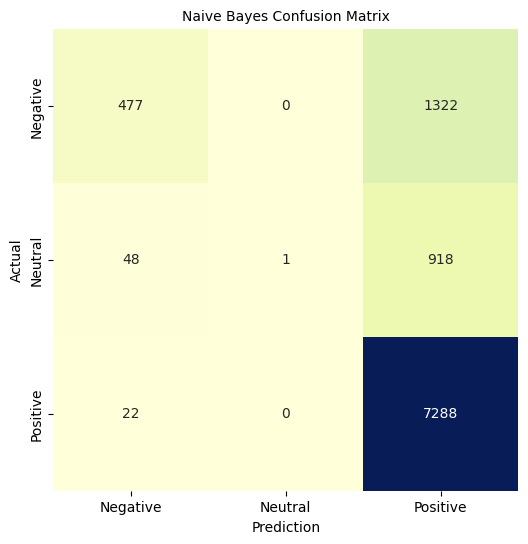

In [48]:
cm1 = confusion_matrix_(y_test, y_pred1)
plot_confusion_matrix(cm1, 'Naive Bayes')


In [49]:
False_Postive, True_Positive, False_Negative, True_Negative = positive_negative(cm1)

In [50]:
MetricsValues1 = performance_metrics(False_Postive, True_Positive, False_Negative, True_Negative)

In [51]:
MetricsValues1

,Values
Accuracy,0.847162
Precision,0.770742
Sensitivity,0.770742
Specificity,0.885371
F1Score,0.770742
Error,0.152838


**2. Logistic Regression**

In [52]:
model_name2 = LogisticRegression()
y_pred2 = models_(model_name2)

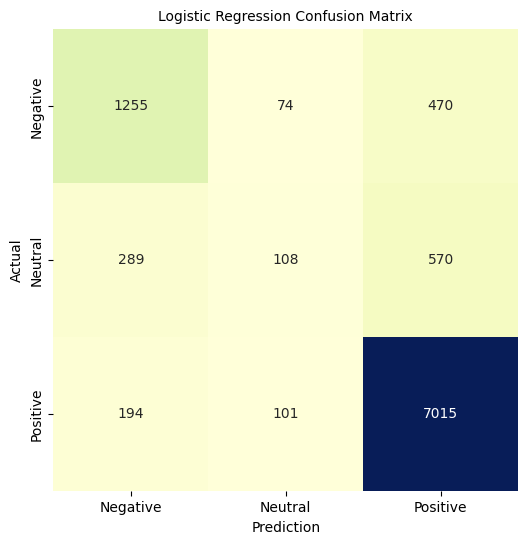

In [53]:
cm2 = confusion_matrix_(y_test, y_pred2)
plot_confusion_matrix(cm2, 'Logistic Regression')

In [54]:
False_Postive2, True_Positive2, False_Negative2, True_Negative2 = positive_negative(cm2)
MetricsValues2 = performance_metrics(False_Postive2, True_Positive2, False_Negative2, True_Negative2)
MetricsValues2

,Values
Accuracy,0.887654
Precision,0.831481
Sensitivity,0.831481
Specificity,0.915740
F1Score,0.831481
Error,0.112346


**3. Decision Tree**

In [55]:
model_name3 = DecisionTreeClassifier(criterion = 'entropy')
y_pred3 = models_(model_name3)

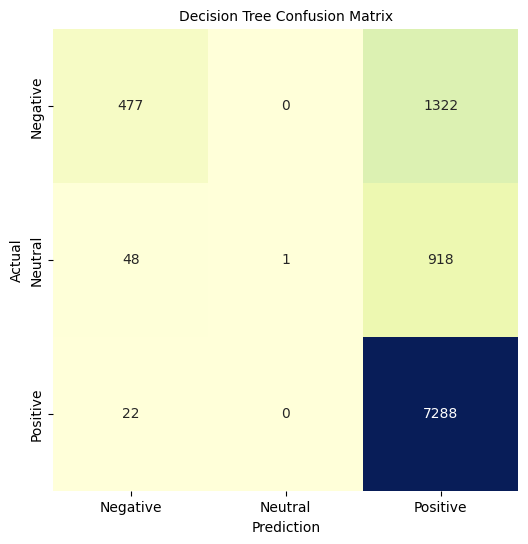

In [56]:
cm3 = confusion_matrix_(y_test, y_pred3)
plot_confusion_matrix(cm1, 'Decision Tree')

In [57]:
False_Postive3, True_Positive3, False_Negative3, True_Negative3 = positive_negative(cm3)
MetricsValues3 = performance_metrics(False_Postive3, True_Positive3, False_Negative3, True_Negative3)
MetricsValues3

,Values
Accuracy,0.842729
Precision,0.764093
Sensitivity,0.764093
Specificity,0.882046
F1Score,0.764093
Error,0.157271


**4. K Nearest Neighbor**

In [58]:
model_name4 = KNeighborsClassifier(metric='cosine', n_neighbors=1)
y_pred4 = models_(model_name4)

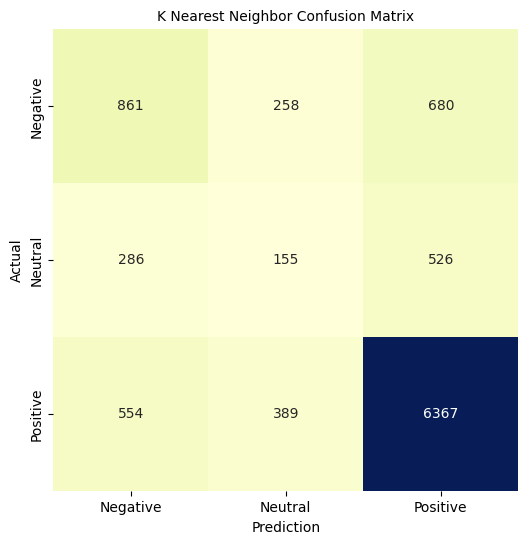

In [59]:
cm4 = confusion_matrix_(y_test, y_pred4)
plot_confusion_matrix(cm4, 'K Nearest Neighbor')

In [60]:
False_Postive4, True_Positive4, False_Negative4, True_Negative4 = positive_negative(cm4)
MetricsValues4 = performance_metrics(False_Postive4, True_Positive4, False_Negative4, True_Negative4)
MetricsValues4

,Values
Accuracy,0.821821
Precision,0.732731
Sensitivity,0.732731
Specificity,0.866366
F1Score,0.732731
Error,0.178179


**5. Random Forest**

In [61]:
model_name5 = RandomForestClassifier(criterion = 'entropy', n_estimators=100)
y_pred5 = models_(model_name5)

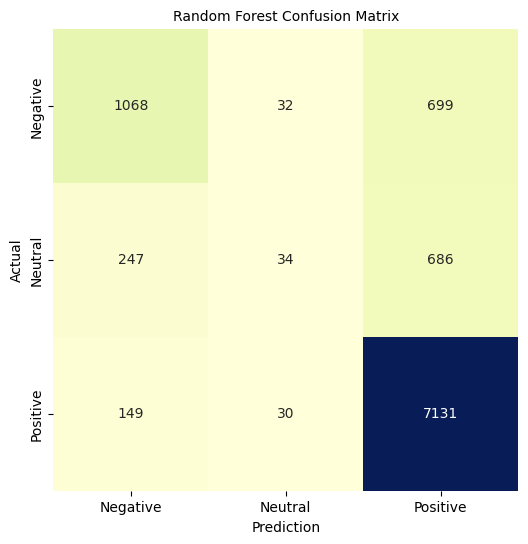

In [62]:
cm5 = confusion_matrix_(y_test, y_pred5)
plot_confusion_matrix(cm5, 'Random Forest')

In [63]:
False_Postive5, True_Positive5, False_Negative5, True_Negative5 = positive_negative(cm5)
MetricsValues5 = performance_metrics(False_Postive5, True_Positive5, False_Negative5, True_Negative5)
MetricsValues5

,Values
Accuracy,0.878060
Precision,0.817090
Sensitivity,0.817090
Specificity,0.908545
F1Score,0.817090
Error,0.121940


**6.SGD Classifier**

In [64]:
model_name6 = SGDClassifier(loss='hinge')
y_pred6 = models_(model_name6)

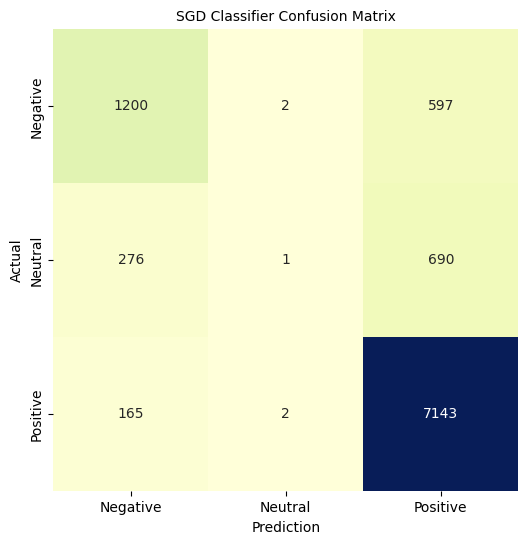

In [65]:
cm6 = confusion_matrix_(y_test, y_pred6)
plot_confusion_matrix(cm6, 'SGD Classifier')

In [66]:
False_Postive6, True_Positive6, False_Negative6, True_Negative6 = positive_negative(cm6)
MetricsValues6 = performance_metrics(False_Postive6, True_Positive6, False_Negative6, True_Negative6)
MetricsValues6

,Values
Accuracy,0.885404
Precision,0.828106
Sensitivity,0.828106
Specificity,0.914053
F1Score,0.828106
Error,0.114596


**7.Support  Vector Machine**

In [67]:
model_name7 = SVC(kernel='rbf')
y_pred7 = models_(model_name7)

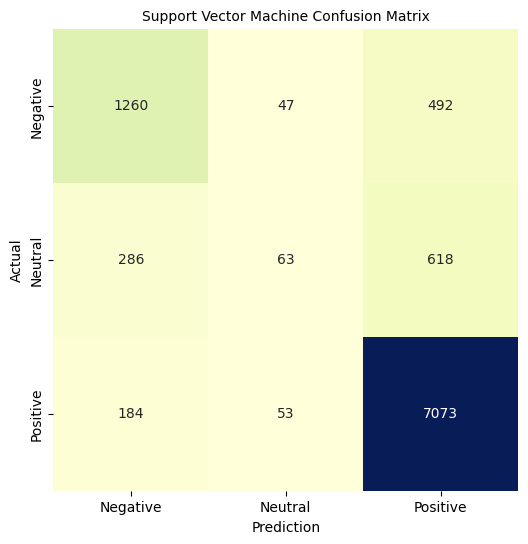

In [68]:
cm7 = confusion_matrix_(y_test, y_pred7)
plot_confusion_matrix(cm7, 'Support Vector Machine')

In [69]:
False_Postive7, True_Positive7, False_Negative7, True_Negative7 = positive_negative(cm7)
MetricsValues7 = performance_metrics(False_Postive7, True_Positive7, False_Negative7, True_Negative7)
MetricsValues7

,Values
Accuracy,0.888845
Precision,0.833267
Sensitivity,0.833267
Specificity,0.916634
F1Score,0.833267
Error,0.111155


**8- Multilayer Perceptron (MLP) Classifier**

In [70]:
model_name8 = MLPClassifier(hidden_layer_sizes = 100, activation='tanh')
y_pred8 = models_(model_name8)

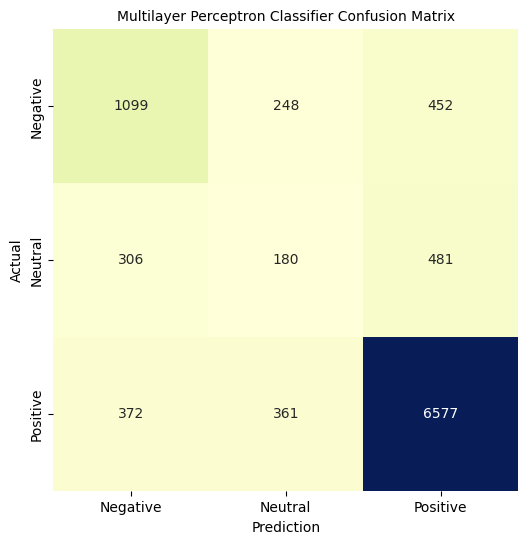

In [71]:
cm8 = confusion_matrix_(y_test, y_pred8)
plot_confusion_matrix(cm8, 'Multilayer Perceptron Classifier')

In [72]:
False_Postive8, True_Positive8, False_Negative8, True_Negative8 = positive_negative(cm8)
MetricsValues8 = performance_metrics(False_Postive8, True_Positive8, False_Negative8, True_Negative8)
MetricsValues8

,Values
Accuracy,0.853116
Precision,0.779674
Sensitivity,0.779674
Specificity,0.889837
F1Score,0.779674
Error,0.146884
